In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost
%matplotlib inline

In [74]:
df=pd.read_csv('dfile.csv')
df=df.drop(['Unnamed: 0','max_voltage','min_voltage','min_frac','nsteps','min_instability'],axis=1)
df.head()


,average_voltage,capacity_grav,capacity_vol,energy_grav,energy_vol,max_frac,numsites
0,2.325185,50.228609,269.262771,116.790816,626.085802,0.083333,11
1,3.291748,39.674483,154.215698,130.598387,507.639167,0.052632,18
2,3.609671,181.943205,651.708695,656.755144,2352.454095,0.183673,40
3,3.201169,73.484217,329.726946,235.235410,1055.511733,0.090909,10
4,2.438309,73.484217,306.081406,179.177232,746.321063,0.090909,10


In [75]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


print(y.head())

0    2.325185
1    3.291748
2    3.609671
3    3.201169
4    2.438309
Name: average_voltage, dtype: float64


In [76]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)



In [77]:
X_train.shape,X_test.shape

((3497, 6), (875, 6))

In [78]:
# from sklearn.ensemble import IsolationForest

# iso = IsolationForest(contamination=0.1)
# yhat = iso.fit_predict(X_train)
# # select all rows that are not outliers
# mask = yhat != -1
# X_train, y_train = X_train[mask], y_train[mask]
# # summarize the shape of the updated training dataset
# print(X_train.shape, y_train.shape)

In [79]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import BayesianRidge


xgb_r = xgboost.XGBRegressor()
  

models=[xgb_r,SVR(),GradientBoostingRegressor(),RandomForestRegressor(),BayesianRidge()]
# Fitting the model
for model in models:
    model.fit(X_train, y_train)
  
    # Predict the model
    pred = model.predict(X_test)
  
    # RMSE Computation
    r2 = r2_score(y_test, pred)
    print("r2_score: % f"%(r2))
    print(str(model))

r2_score:  0.990798
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
r2_score:  0.948017
SVR()
r2_score:  0.956665
GradientBoostingRegressor()
r2_score:  0.988810
RandomForestRegressor()
r2_score:  0.475129
BayesianRidge()


In [80]:
model.coef_

array([ 0.00036023, -0.00109732,  0.00251193,  0.00013846, -0.00339626,
        0.02503161])

In [81]:
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
r2 = r2_score(y_test, pred)
print("r2_score: % f"%(r2))
print(str(xgb_r))

r2_score:  0.990798
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [82]:
import shap

pred = xgb_r.predict(X_test, output_margin=True)
explainer = shap.Explainer(xgb_r)
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


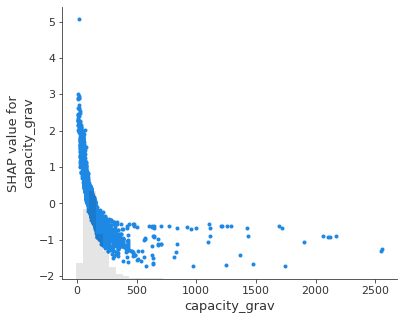

In [90]:
shap.plots.scatter(shap_values[:,0])

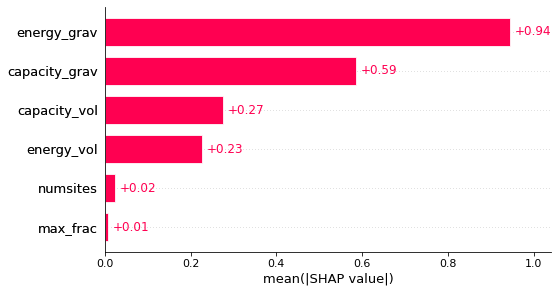

In [84]:
shap.plots.bar(shap_values)

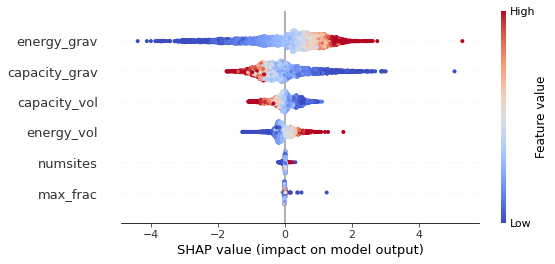

In [86]:
shap.summary_plot(shap_values, X_train,cmap="coolwarm")

In [92]:
    !pip install interpret

     |████████████████████████████████| 6.6 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 773 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 302 kB/s eta 0:00:01��████████████████████████████ | 3.5 MB 190 kB/s eta 0:00:01
     |████████████████████████████████| 756 kB 320 kB/s eta 0:00:01
     |████████████████████████████████| 275 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 515 kB/s eta 0:00:01
     |████████████████████████████████| 81 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 128 kB 1.5 MB/s eta 0:00:01
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=47bc8f64b9940d515738cfc5e78d9617ca6fa4cc186c03a4405ce7bcc265041a
  Stored in directory: /home/joy/.cache/pip/wheels/2b/37/e9/4b5a8c878a47590de4dcf6bdc